In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics


In [2]:
df = pd.read_csv("ML3 Data.csv")
df.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,ar16,ar17,ar18,ar19,ar20,ar21,ar22,ar23,ar24,ar25
0,73557,8,2,1,69,NaN,4,4,1,NaN,...,1.470207,4.864849,3.636711,-9.174492,-9.353410,5.153847,1.294983,-1.015693,-8.671692,5.423061
1,73558,8,2,1,54,NaN,3,3,1,NaN,...,-7.363791,-2.566326,0.776046,-2.951925,-0.538597,3.770290,6.711471,3.521875,-1.765809,-5.383746
2,73559,8,2,1,72,NaN,3,3,2,NaN,...,-7.187977,-9.730452,9.906254,7.636725,-7.642553,7.356881,-9.626078,3.871285,-1.673816,-3.973037
3,73560,8,2,1,9,NaN,3,3,1,119.0,...,-7.164299,-8.283262,0.184733,1.245878,-9.309774,1.965447,-8.320304,-6.444928,-4.297771,1.870141
4,73561,8,2,2,73,NaN,3,3,1,NaN,...,0.127513,-8.721841,0.013319,3.599418,9.263045,4.388852,6.608509,-6.813265,-9.492588,-0.342957


In [3]:
clean_df = df.fillna(0)

In [4]:
clean_df.isnull().sum()

SEQN        0
SDDSRVYR    0
RIDSTATR    0
RIAGENDR    0
RIDAGEYR    0
           ..
ar21        0
ar22        0
ar23        0
ar24        0
ar25        0
Length: 662, dtype: int64

In [5]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Columns: 662 entries, SEQN to ar25
dtypes: float64(641), int64(21)
memory usage: 49.6 MB


In [6]:
clean_df.describe()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,ar16,ar17,ar18,ar19,ar20,ar21,ar22,ar23,ar24,ar25
count,9813.000000,9813.0,9813.0,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,...,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000
mean,78644.559971,8.0,2.0,1.507694,31.629573,0.671151,3.083766,3.277897,1.508509,46.143585,...,-1.868362,-3.024976,0.103960,1.732914,-2.639643,0.516211,0.847771,0.436837,-2.754273,2.018194
std,2938.592266,0.0,0.0,0.499966,24.397553,3.077240,1.262812,1.607957,0.499953,70.145654,...,5.689419,5.572118,5.621485,4.612798,7.025533,5.099966,7.074776,5.891879,5.608956,4.114095
min,73557.000000,8.0,2.0,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,-9.932773,-9.742275,-9.504686,-9.936065,-9.915099,-9.905405,-9.646950,-9.329935,-9.574369,-9.877965
25%,76092.000000,8.0,2.0,1.000000,10.000000,0.000000,2.000000,2.000000,1.000000,0.000000,...,-7.164033,-8.291340,-6.029267,-1.014871,-9.200133,-2.849344,-8.087627,-6.434927,-7.405031,-0.326282
50%,78643.000000,8.0,2.0,2.000000,27.000000,0.000000,3.000000,3.000000,2.000000,0.000000,...,-3.237602,-4.672666,0.173614,1.830624,-5.338621,1.884456,0.814447,-0.763828,-4.263325,1.885457
75%,81191.000000,8.0,2.0,2.000000,52.000000,0.000000,4.000000,4.000000,2.000000,84.000000,...,1.883083,2.533461,5.417423,4.025792,1.521804,5.003854,8.079576,7.174353,1.071647,4.904403
max,83731.000000,8.0,2.0,2.000000,80.000000,24.000000,5.000000,7.000000,2.000000,239.000000,...,9.984094,10.010548,9.933308,9.580645,9.837051,9.202594,9.679657,8.967017,9.944636,8.362119


In [7]:
clean_df.drop('SEQN', axis=1, inplace=True)

In [93]:
#10 Data Transformation : Scale the numerical features using MinMaxScaler.

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
min_max = MinMaxScaler()
out = min_max.fit_transform(clean_df)

In [10]:
out

array([[0.        , 0.        , 0.        , ..., 0.45440585, 0.04624603,
        0.83886819],
       [0.        , 0.        , 0.        , ..., 0.70240167, 0.40004908,
        0.24639244],
       [0.        , 0.        , 0.        , ..., 0.72149829, 0.40476206,
        0.32373357],
       ...,
       [0.        , 0.        , 1.        , ..., 0.97996691, 0.80556664,
        0.89549851],
       [0.        , 0.        , 0.        , ..., 0.52008892, 0.02582691,
        0.61771769],
       [0.        , 0.        , 0.        , ..., 0.43532958, 0.17218867,
        0.92159833]])

In [11]:
trans_df = pd.DataFrame(out, columns=clean_df.columns)
trans_df.head(5)

,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,...,ar16,ar17,ar18,ar19,ar20,ar21,ar22,ar23,ar24,ar25
0,0.0,0.0,0.0,0.8625,0.0,0.75,0.500000,0.0,0.000000,0.142857,...,0.572529,0.739496,0.676068,0.039022,0.028437,0.788112,0.566159,0.454406,0.046246,0.838868
1,0.0,0.0,0.0,0.6750,0.0,0.50,0.333333,0.0,0.000000,0.285714,...,0.128985,0.363287,0.528899,0.357854,0.474708,0.715705,0.846420,0.702402,0.400049,0.246392
2,0.0,0.0,0.0,0.9000,0.0,0.50,0.333333,1.0,0.000000,0.142857,...,0.137813,0.000599,0.998608,0.900397,0.115053,0.903406,0.001080,0.721498,0.404762,0.323734
3,0.0,0.0,0.0,0.1125,0.0,0.50,0.333333,0.0,0.497908,0.000000,...,0.139001,0.073864,0.498478,0.572942,0.030646,0.621250,0.068643,0.157677,0.270331,0.644082
4,0.0,0.0,1.0,0.9125,0.0,0.50,0.333333,0.0,0.000000,0.285714,...,0.505114,0.051660,0.489660,0.693533,0.970940,0.748077,0.841092,0.137546,0.004190,0.522750


In [92]:
#11. Optimal Cluster Identification : Use silhouette scores and the elbow method to find the
#optimal number of clusters for KMeans.


In [12]:
from sklearn.cluster import KMeans

In [13]:
wcss = []
for i in range(1,21):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(trans_df)
    wcss.append(kmeans.inertia_)

In [14]:
import matplotlib.pyplot as plt

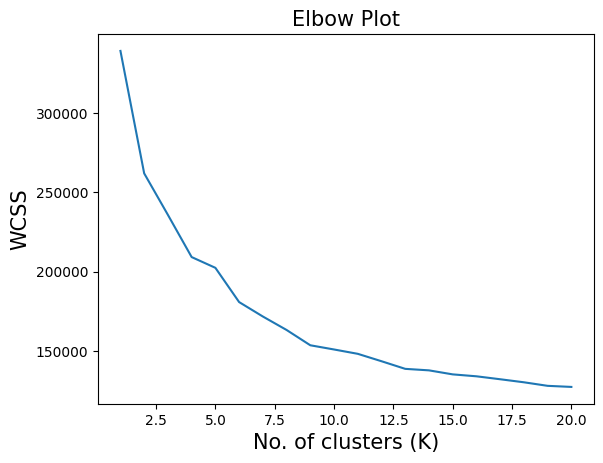

In [15]:
plt.plot(range(1,21), wcss)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

# display the plot
plt.show()

In [16]:
from sklearn.metrics import silhouette_score, silhouette_samples
# create a list for different values of K
n_clusters = [2, 3, 4, 5, 6, 8, 10, 12, 14, 16]

# use 'for' loop to build the clusters
# 'random_state' returns the same sample each time you run the code  
# fit and predict on the scaled data
# 'silhouette_score' function computes the silhouette score for each K
for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(trans_df)
    score = silhouette_score(trans_df, predict, random_state= 10)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.21504277556361423)
For 3 clusters the silhouette score is 0.19669778251237618)
For 4 clusters the silhouette score is 0.1917737881376768)
For 5 clusters the silhouette score is 0.16014755276734474)
For 6 clusters the silhouette score is 0.18024162777204988)
For 8 clusters the silhouette score is 0.1867545435990261)
For 10 clusters the silhouette score is 0.1872535499404707)
For 12 clusters the silhouette score is 0.18813110774004443)
For 14 clusters the silhouette score is 0.16837571582457278)
For 16 clusters the silhouette score is 0.1513107740024867)


In [17]:
X=trans_df

In [19]:
X

,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,...,ar16,ar17,ar18,ar19,ar20,ar21,ar22,ar23,ar24,ar25
0,0.0,0.0,0.0,0.8625,0.0,0.75,0.500000,0.0,0.000000,0.142857,...,0.572529,0.739496,0.676068,0.039022,0.028437,0.788112,0.566159,0.454406,0.046246,0.838868
1,0.0,0.0,0.0,0.6750,0.0,0.50,0.333333,0.0,0.000000,0.285714,...,0.128985,0.363287,0.528899,0.357854,0.474708,0.715705,0.846420,0.702402,0.400049,0.246392
2,0.0,0.0,0.0,0.9000,0.0,0.50,0.333333,1.0,0.000000,0.142857,...,0.137813,0.000599,0.998608,0.900397,0.115053,0.903406,0.001080,0.721498,0.404762,0.323734
3,0.0,0.0,0.0,0.1125,0.0,0.50,0.333333,0.0,0.497908,0.000000,...,0.139001,0.073864,0.498478,0.572942,0.030646,0.621250,0.068643,0.157677,0.270331,0.644082
4,0.0,0.0,1.0,0.9125,0.0,0.50,0.333333,0.0,0.000000,0.285714,...,0.505114,0.051660,0.489660,0.693533,0.970940,0.748077,0.841092,0.137546,0.004190,0.522750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,0.0,0.0,0.0,0.3250,0.0,0.25,0.166667,1.0,0.000000,0.285714,...,0.309464,0.033370,0.425367,0.094980,0.041584,0.711404,0.860647,0.099858,0.110281,0.511496
9809,0.0,0.0,1.0,0.0250,1.0,0.00,0.000000,1.0,0.100418,0.000000,...,0.179258,0.845513,0.832130,0.472188,0.223899,0.001103,0.540489,0.519263,0.026190,0.616832
9810,0.0,0.0,1.0,0.5250,0.0,0.75,0.500000,1.0,0.000000,0.285714,...,0.073677,0.622311,0.632644,0.602908,0.999058,0.308896,0.957413,0.979967,0.805567,0.895499
9811,0.0,0.0,0.0,0.0875,0.0,0.25,0.166667,0.0,0.351464,0.000000,...,0.179166,0.844889,0.832904,0.471407,0.223292,0.000294,0.540810,0.520089,0.025827,0.617718


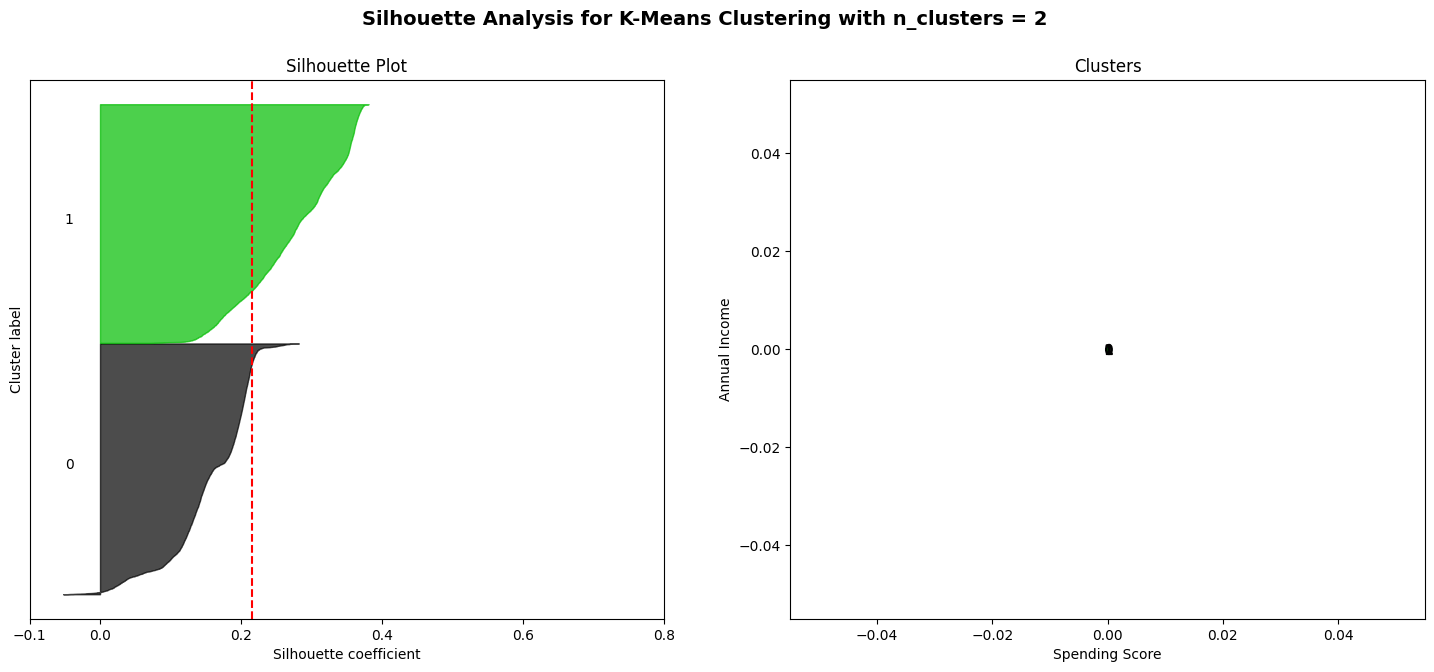

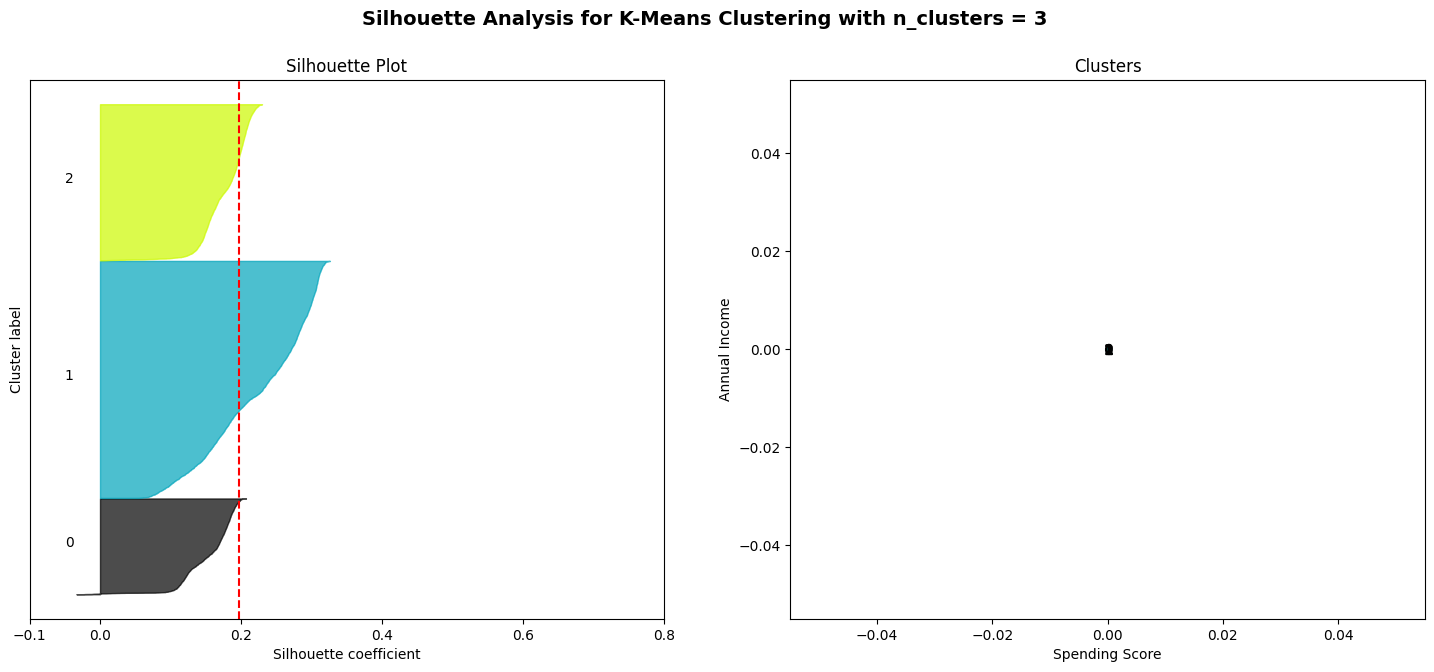

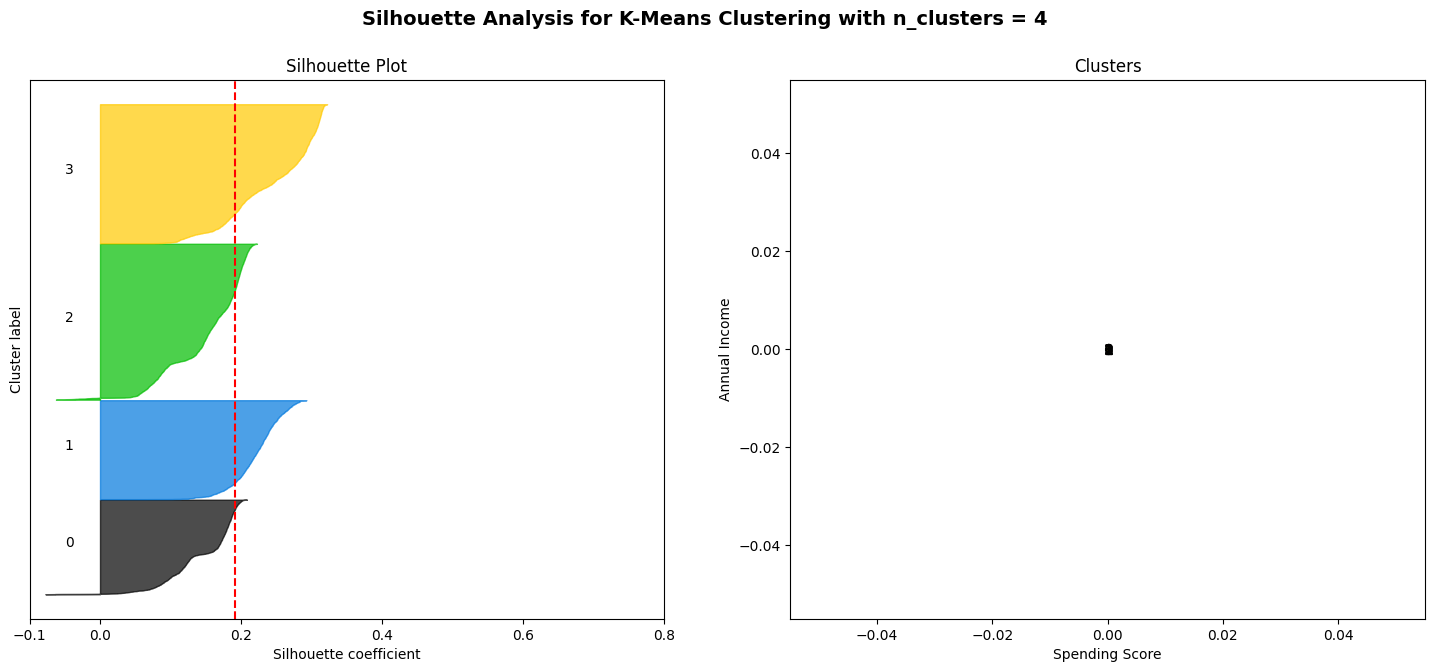

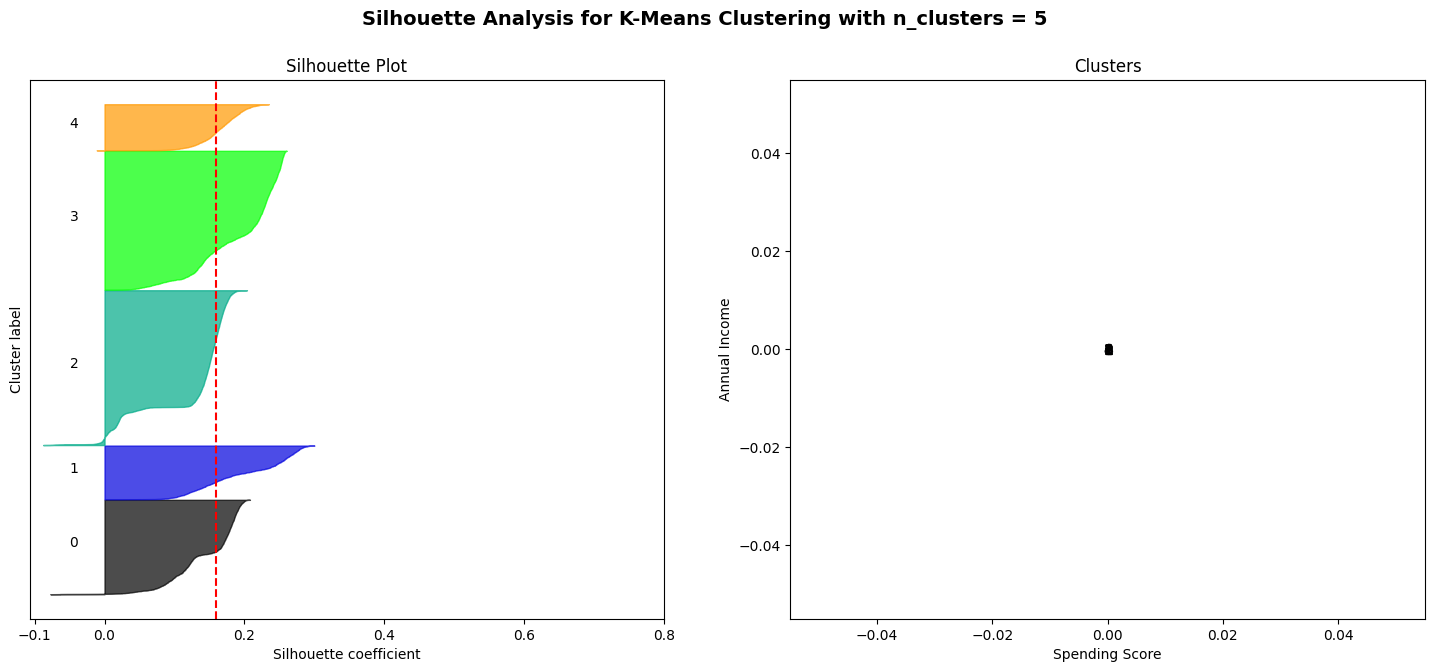

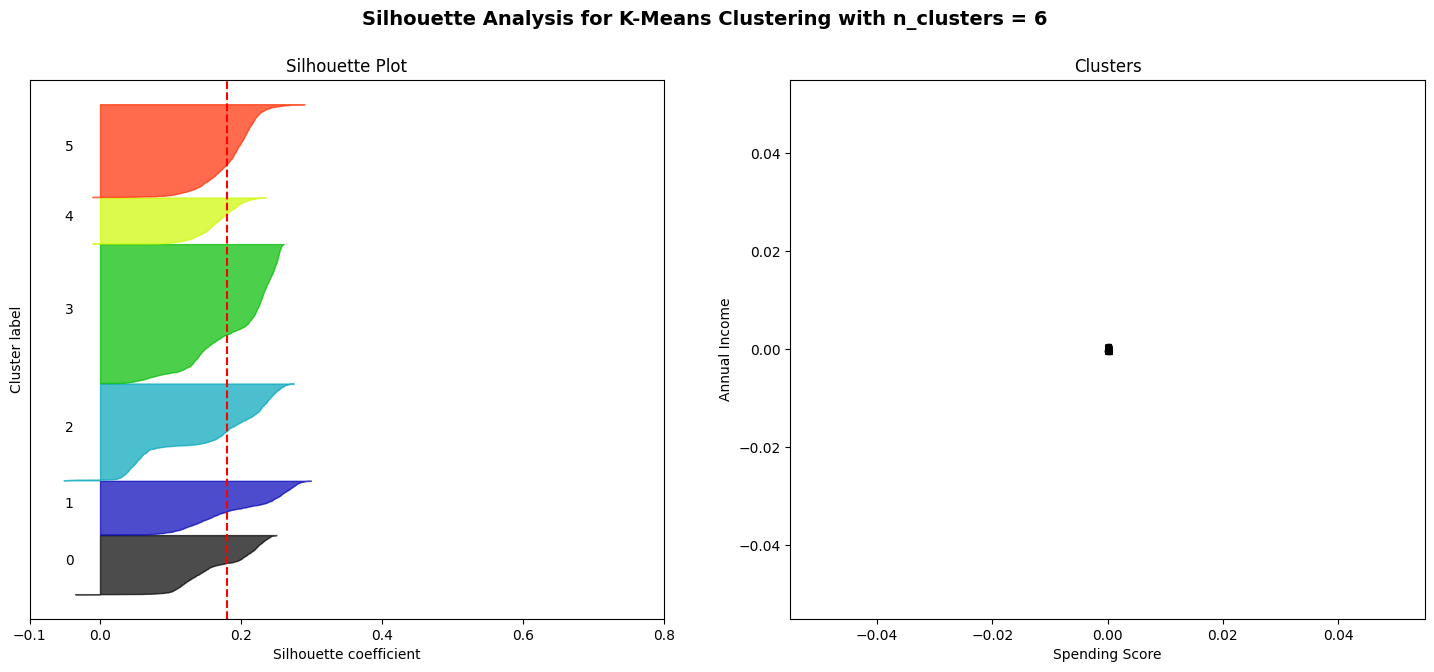

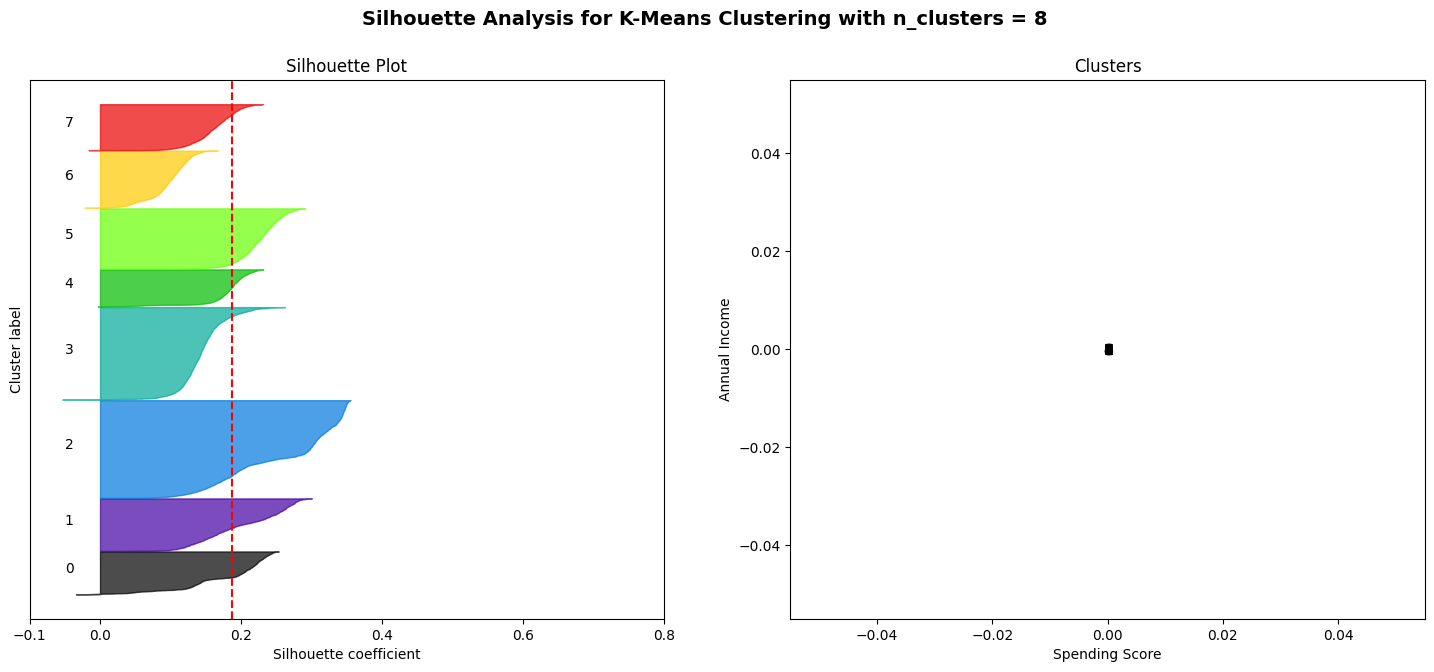

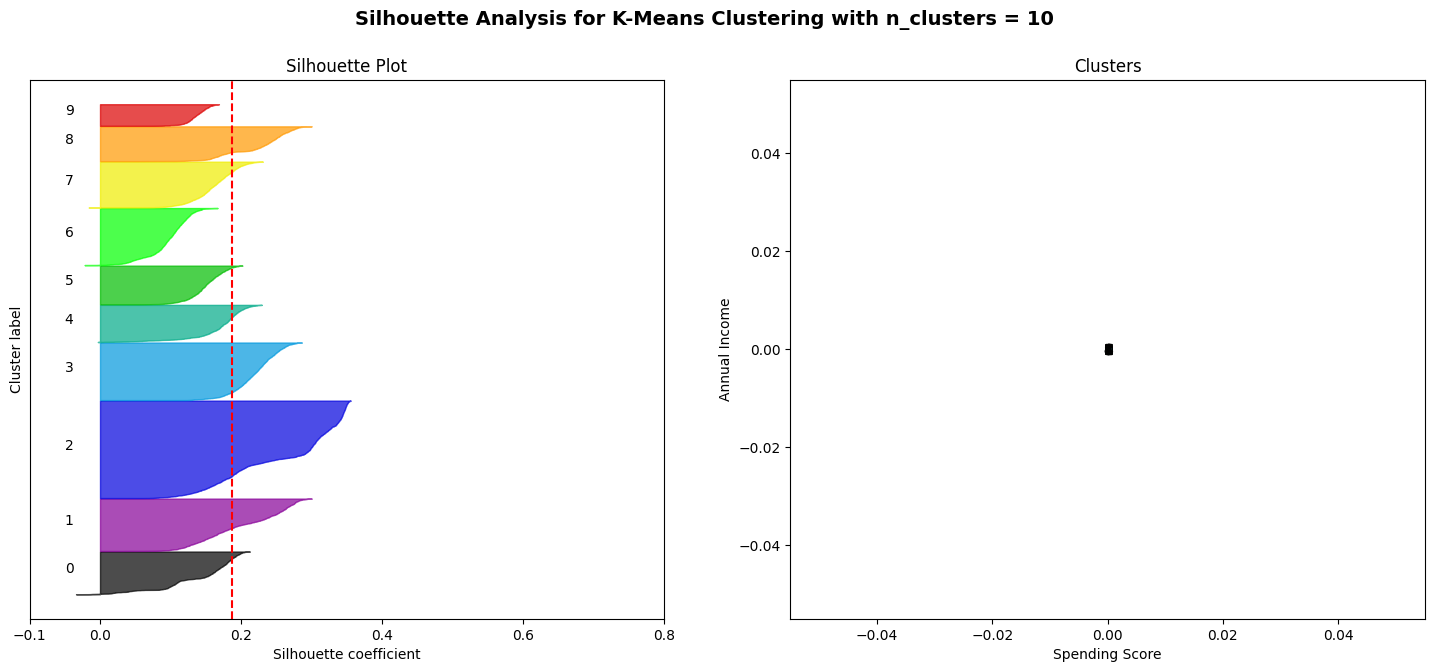

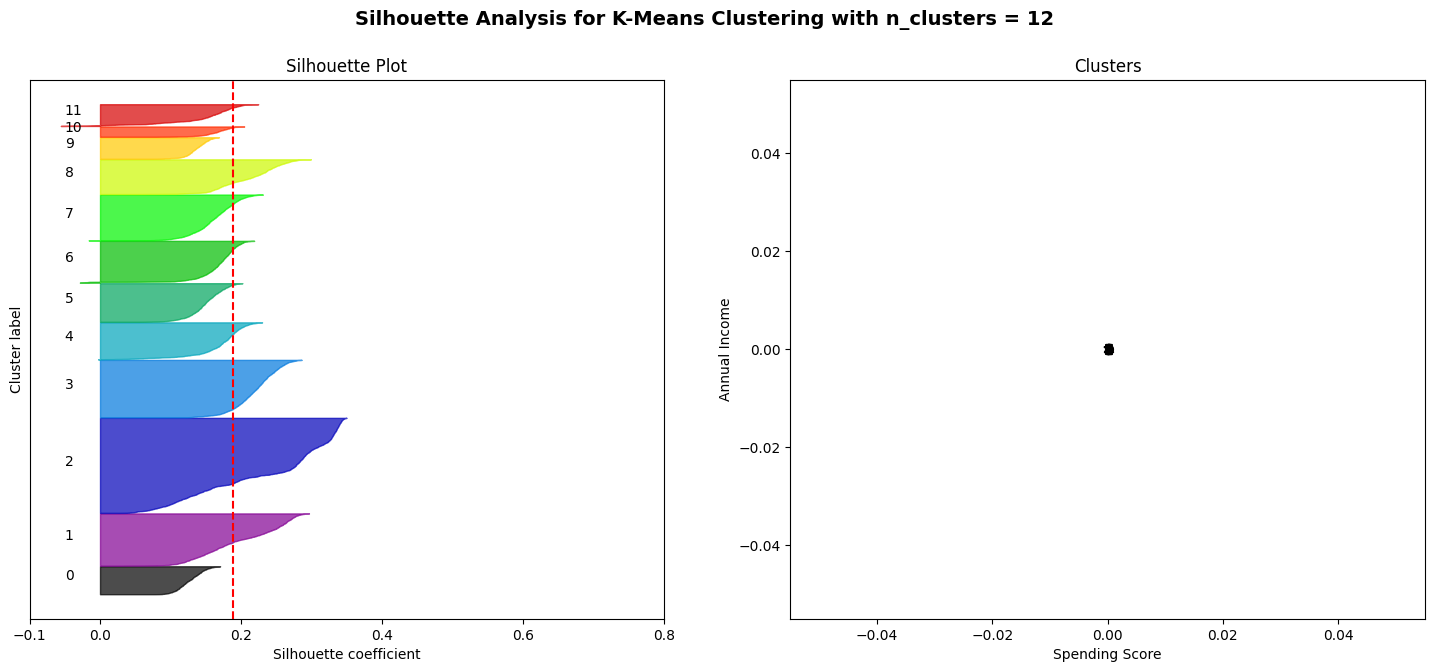

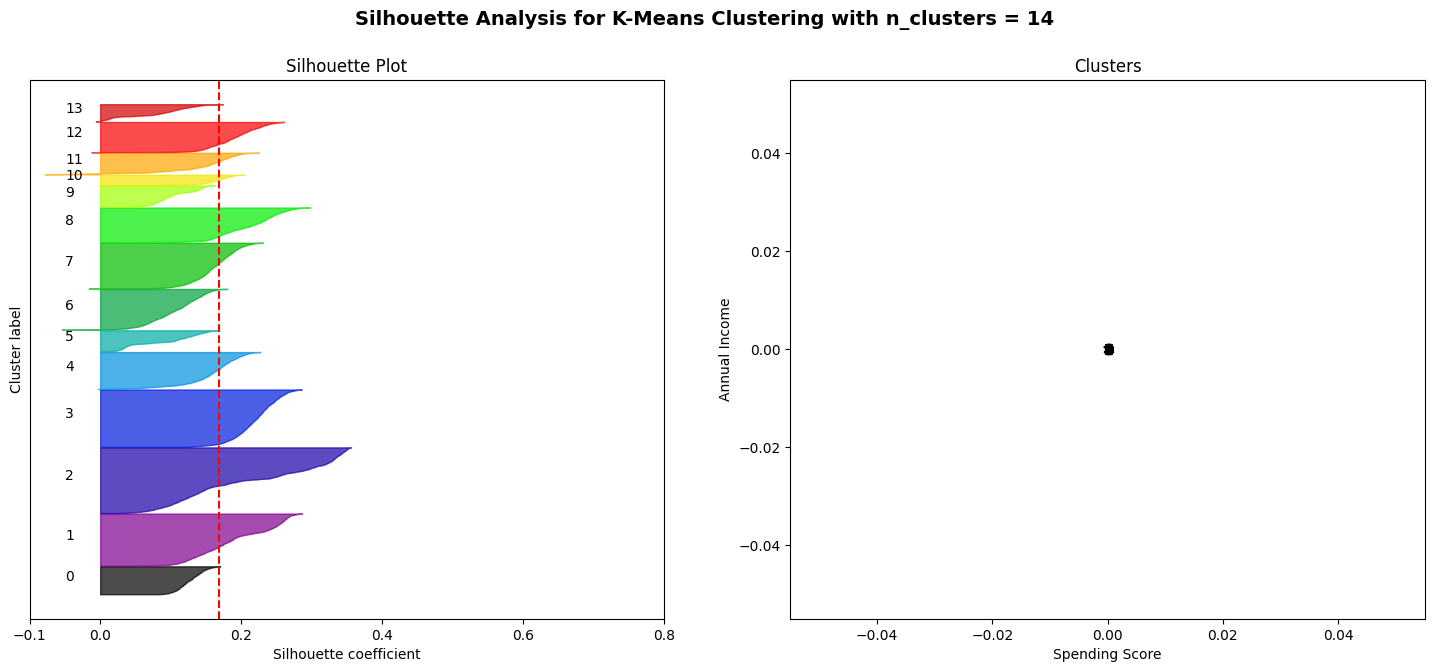

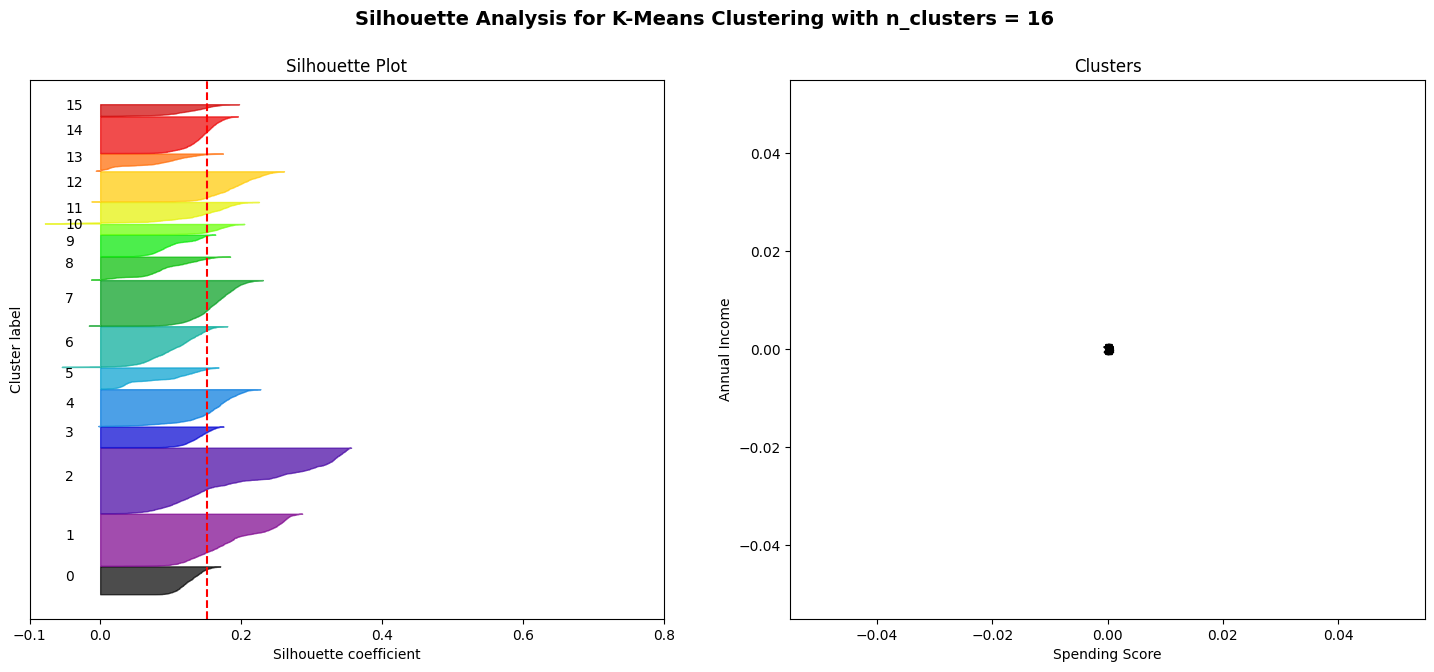

In [20]:
import matplotlib.cm as cm
# consider the number of clusters
n_clusters = [2, 3, 4, 5, 6, 8, 10, 12, 14, 16]

# consider an array of the data
#X = np.array(X)

# for each value of K, plot the silhouette plot the clusters formed
for K in n_clusters:
    
    # create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    # set the figure size
    fig.set_size_inches(18, 7)

    # the 1st subplot is the silhouette plot
    # initialize the cluster with 'K' value and a random generator
    model = KMeans(n_clusters = K, random_state = 10)
    
    # fit and predict on the scaled data
    cluster_labels = model.fit_predict(X)

    # the 'silhouette_score()' gives the average value for all the samples
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    # Compute the silhouette coefficient for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(K):
        
        # aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        
        # sort the silhouette coefficient
        ith_cluster_silhouette_values.sort()
        
        # calculate the size of the cluster
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # color each cluster 
        color = cm.nipy_spectral(float(i) / K)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # compute the new y_lower for next plot
        y_lower = y_upper + 10 

    # set the axes and plot label
    ax1.set_title("Silhouette Plot")
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Cluster label")

    # plot the vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # clear the y-axis ticks
    ax1.set_yticks([])  
    
    # set the ticks for x-axis 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8])

    
    # 2nd plot showing the actual clusters formed
    # consider different color for each cluster
    colors = cm.nipy_spectral(cluster_labels.astype(float) / K)
    
    # plot a scatter plot to visualize the clusters
    ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # label the cluster centers
    centers = model.cluster_centers_
    
    # display the cluster center with cluster number
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    
    # add the axes and plot title
    ax2.set_title("Clusters")
    ax2.set_xlabel("Spending Score")
    ax2.set_ylabel("Annual Income")
    
    # set the common title for subplots
    plt.suptitle(("Silhouette Analysis for K-Means Clustering with n_clusters = %d" % K), fontsize=14, 
                 fontweight='bold')

# display the plot
plt.show()

In [90]:
#Inference:
#3 Clusters show better results where the silhouette coefficient is above average and only one cluster has below 0.

In [ ]:
#12: KMEANS for clustering

In [21]:
model = KMeans(n_clusters = 3, random_state = 10)
    
# fit and predict on the scaled data
cluster_labels = model.fit_predict(X)

In [23]:
#Correlation analysis
cluster_labels

array([0, 2, 1, ..., 2, 1, 1])

In [24]:
#PCA

In [25]:
from sklearn.decomposition import PCA

In [26]:
pca = PCA()
X_train_2 = pca.fit_transform(X)

In [34]:
pca.explained_variance_.shape

(661,)

In [37]:
df = pd.DataFrame(pca.explained_variance_.reshape(1,661), columns=X.columns)
df

,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,...,ar16,ar17,ar18,ar19,ar20,ar21,ar22,ar23,ar24,ar25
0,9.187631,4.94067,3.695322,1.95311,1.719017,1.483768,0.874496,0.704169,0.518561,0.495757,...,3.928609e-32,3.928609e-32,3.928609e-32,3.928609e-32,3.928609e-32,3.928609e-32,3.928609e-32,3.928609e-32,3.928609e-32,3.733149e-32


In [39]:
df.sort_values(ascending=False, by=0, axis=1)

,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,...,ar11,ar10,ar9,ar8,ar7,ar5,ar4,ar3,ar2,ar25
0,9.187631,4.94067,3.695322,1.95311,1.719017,1.483768,0.874496,0.704169,0.518561,0.495757,...,3.928609e-32,3.928609e-32,3.928609e-32,3.928609e-32,3.928609e-32,3.928609e-32,3.928609e-32,3.928609e-32,3.928609e-32,3.733149e-32


In [42]:
total = df.iloc[0].sum()

In [88]:
ccf = 0
for i in range(df.shape[1]):
    ccf= ccf + df.iloc[0,i]
    print(i, df.iloc[0,i], ccf/total)
    if(ccf/total > 0.95):
        break;

0 9.18763142846123 0.2656691308397102
1 4.940670199411811 0.4085333247142384
2 3.695322053758375 0.5153870884768563
3 1.9531104303854452 0.5718631404946914
4 1.7190174839919592 0.6215701715642755
5 1.4837681486212297 0.664474743594748
6 0.8744955374880503 0.6897616166236291
7 0.704168843399915 0.7101233307440867
8 0.5185607828719127 0.7251180106619569
9 0.49575734287184997 0.7394533073500859
10 0.4507965181297169 0.7524885188830704
11 0.3777346574498115 0.763411076988945
12 0.34768553713219214 0.7734647361038838
13 0.32111660531885305 0.7827501291997566
14 0.2921613859862524 0.7911982544956243
15 0.27666775738913707 0.7991983667344817
16 0.2635533244584185 0.8068192626295743
17 0.25342461167636254 0.8141472771283804
18 0.24634599299903462 0.8212706066127522
19 0.23042451100333625 0.8279335512507778
20 0.20632063861910263 0.8338995094156246
21 0.1948862750527803 0.8395348320457284
22 0.17715249384501192 0.844657365468227
23 0.16622416948911112 0.8494638959626835
24 0.1430166914120507 0.

In [48]:
#Number of features is 78  with 95% explained variance

661

In [ ]:
#PCA for 78 features

In [53]:
x_pca = PCA(n_components=78)

In [54]:
x_red = x_pca.fit_transform(X)

In [55]:
x_red.shape

(9813, 78)

In [61]:
#15: Kmeans applied post PCA 

In [59]:
wcss = []
for i in range(1,21):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(x_red)
    wcss.append(kmeans.inertia_)

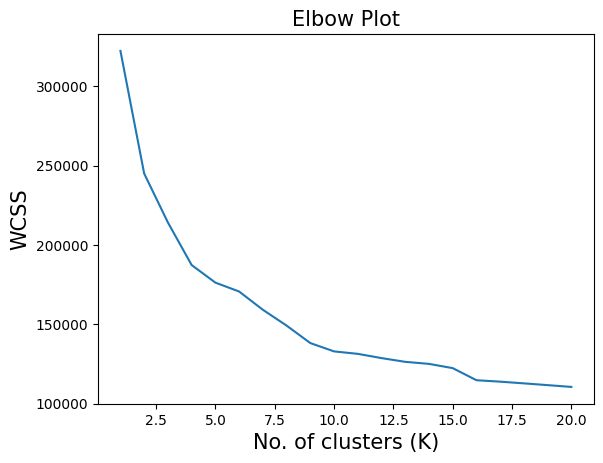

In [60]:
plt.plot(range(1,21), wcss)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

# display the plot
plt.show()

In [ ]:
#16: Dbscan based clustering

In [62]:
from  sklearn.cluster import DBSCAN

In [84]:
db = DBSCAN(eps=2.5, min_samples=90)

In [85]:
clusters_df = pd.DataFrame(np.array(db.fit_predict(x_red)), columns=['Clusters'])

In [86]:
clusters_df.value_counts()

Clusters
-1          8962
 0           598
 1           253
Name: count, dtype: int64

In [87]:
#Three Clusters are identified by DBSCAN